In [66]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import torch 
from torch import nn

tensor([2, 1, 1, 1, 2, 0, 1, 2, 0, 0], dtype=torch.uint8)

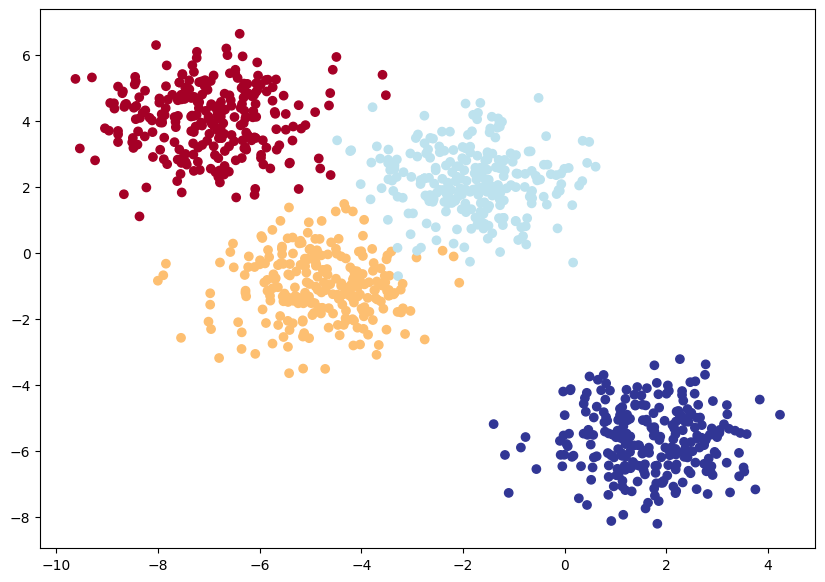

In [67]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 122

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            random_state=RANDOM_SEED,
                            cluster_std=1)

fig, ax = plt.subplots()
ax.scatter(X_blob[:,0], X_blob[:,1],
           c=y_blob,
           cmap=plt.cm.RdYlBu)

fig.set_size_inches(10, 7)

X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.ByteTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)
y_blob[:10]

In [68]:
device = "cuda" if torch.cuda.is_available() else "cpu"

class BlobModel(nn.Module):
    def __init__(self, input_features: int, output_features: int, hidden_units=8):
        """Initializes multi-class classification model.
        
        Args:
            input_features (int): Number of input Features to de model
            output_features (int): Number of outputs features (number of output classes)
            hidden_units (int): Number of hidden units between layers, defaut 8

        Returns:

        Example:
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features),
        )
    def forward(self, x):
        return self.linear_layer_stack(x)
    
model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)
model_4, torch.unique(y_blob_test)

(BlobModel(
   (linear_layer_stack): Sequential(
     (0): Linear(in_features=2, out_features=8, bias=True)
     (1): ReLU()
     (2): Linear(in_features=8, out_features=8, bias=True)
     (3): ReLU()
     (4): Linear(in_features=8, out_features=4, bias=True)
   )
 ),
 tensor([0, 1, 2, 3], dtype=torch.uint8))

In [69]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.01)

In [70]:
model_4 = model_4.to(device)
X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)

epochs = 6000
epochs_list = []
loss_test_list = []
loss_list = []
test_pred = None

for epoch in range(epochs):
    model_4.train()

    y_logits = model_4(X_blob_train).squeeze()
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    loss = loss_fn(y_logits, y_blob_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_blob_test)

    if epoch % 1 == 0:
        epochs_list.append(epoch)
        loss_test_list.append(test_loss)
        loss_list.append(loss)
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:5f}")






Epoch: 0 | Loss: 1.32396 | Test loss: 1.325669
Epoch: 1 | Loss: 1.32207 | Test loss: 1.323784
Epoch: 2 | Loss: 1.32016 | Test loss: 1.321873
Epoch: 3 | Loss: 1.31821 | Test loss: 1.319935
Epoch: 4 | Loss: 1.31625 | Test loss: 1.317978
Epoch: 5 | Loss: 1.31425 | Test loss: 1.315998
Epoch: 6 | Loss: 1.31223 | Test loss: 1.313993
Epoch: 7 | Loss: 1.31018 | Test loss: 1.311961
Epoch: 8 | Loss: 1.30809 | Test loss: 1.309906
Epoch: 9 | Loss: 1.30597 | Test loss: 1.307830
Epoch: 10 | Loss: 1.30383 | Test loss: 1.305725
Epoch: 11 | Loss: 1.30166 | Test loss: 1.303591
Epoch: 12 | Loss: 1.29945 | Test loss: 1.301427
Epoch: 13 | Loss: 1.29721 | Test loss: 1.299230
Epoch: 14 | Loss: 1.29494 | Test loss: 1.296996
Epoch: 15 | Loss: 1.29263 | Test loss: 1.294729
Epoch: 16 | Loss: 1.29028 | Test loss: 1.292427
Epoch: 17 | Loss: 1.28791 | Test loss: 1.290090
Epoch: 18 | Loss: 1.28549 | Test loss: 1.287718
Epoch: 19 | Loss: 1.28304 | Test loss: 1.285311
Epoch: 20 | Loss: 1.28055 | Test loss: 1.282869
Ep

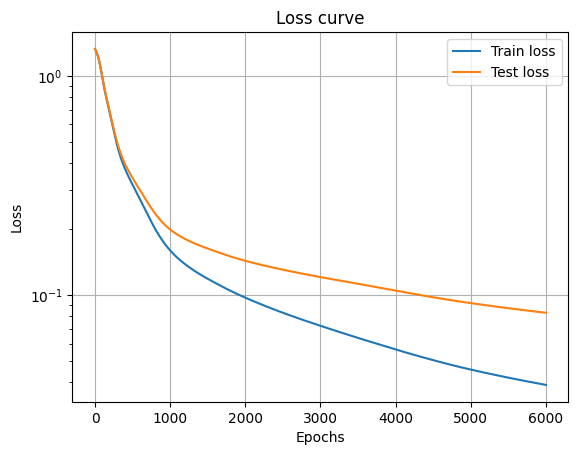

In [71]:
fig, ax = plt.subplots()
ax.plot(epochs_list, torch.tensor(loss_list).cpu().numpy(), label="Train loss")
ax.plot(epochs_list, torch.tensor(loss_test_list).cpu().numpy(), label="Test loss")
ax.set_title("Loss curve")
ax.set_ylabel("Loss")
ax.set_xlabel("Epochs")
ax.set_yscale('log')
ax.legend()
ax.grid()

In [72]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else: 
    print("Download helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


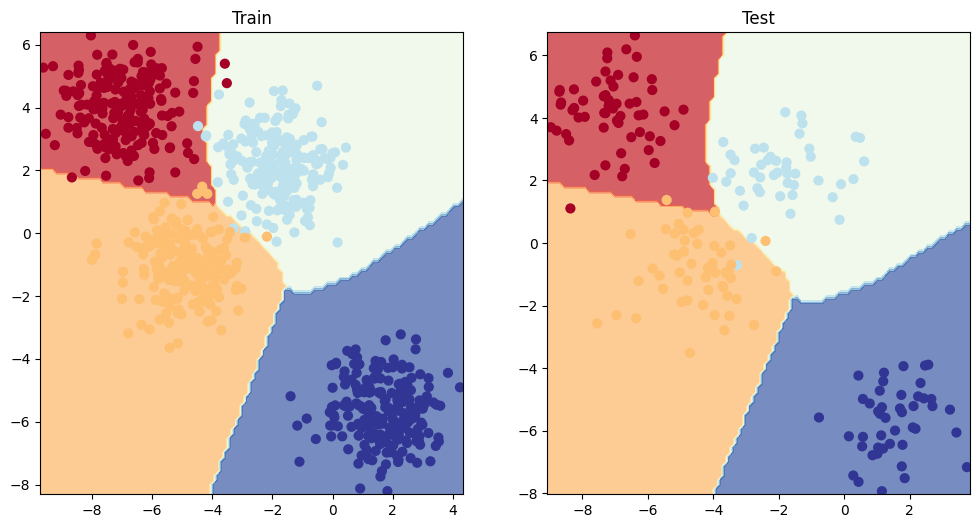

In [75]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [74]:
from torchmetrics import Accuracy
acc = Accuracy(task="multiclass", num_classes=4).to(device)
acc(test_pred, y_blob_test)

tensor(0.9750, device='cuda:0')